In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
births = Table.read_table('baby.csv')

In [3]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


Make a table of just Gestational Days and Maternal Smoking status.

In [9]:
a = births.select("Gestational Days", "Maternal Smoker")
a

Gestational Days,Maternal Smoker
284,False
282,False
279,True
282,True
286,False
244,False
245,False
289,False
299,True
351,False


Generate a table of counts of each smoker status.

In [39]:
b = a.group("Maternal Smoker")
b

Maternal Smoker,count
False,715
True,459


In [42]:
b.append_column("Gestational Days sum", (a.group("Maternal Smoker", sum)).column("Gestational Days sum"))

Maternal Smoker,count,Gestational Days sum
False,715,200110
True,459,127555


Make a histogram of gestational days for each smoking status.

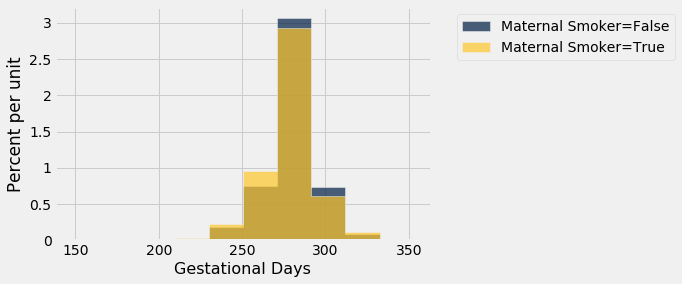

In [18]:
a.hist('Gestational Days', group = 'Maternal Smoker')

## A Test Statistic ##

Generate a table of average gestational days per maternal smoking status.

In [43]:
#b = Table().with_column("Average days per status", 
#                        a.group("Maternal Smoker", sum).column("Gestational Days sum")/a.group("Maternal Smoker").column("count"))
b.append_column("Average days per status", b.column("Gestational Days sum")/b.column("count"))

Maternal Smoker,count,Gestational Days sum,Average days per status
False,715,200110,279.874
True,459,127555,277.898


Find the difference in averages.

In [44]:
b.column("Average days per status")[0] - b.column("Average days per status")[1]

1.9765223882870941

Now put together the code that gets a numerical and categorical column from a table and returns the difference in means of the two samples.

In [47]:
def difference_of_means(table, numerical_variable, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(numerical_variable, group_label)
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    
    return means.item(1) - means.item(0)

In [48]:
difference_of_means(births, 'Gestational Days', 'Maternal Smoker')

-1.9765223882870941

### Shuffles: Simulation Under Null Hypothesis ###

In [ ]:
smoking_and_gdays

Make an array of shuffled smoker statuses without replacement.

Add this shuffled array as another column to smoking and gdays.

Calculate the difference of means based on the original maternal smoking status.

Calculate the difference of means based on the shuffled smoking status labels.

### Permutation Test ###

Now let's take what you wrote above and translate it into a function here.

In [ ]:
def one_simulated_difference(table, numerical_variable, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = ...
    
    # table of numerical variable and shuffled labels
    shuffled_table = ...
    
    #return one value of the test stat
    return ...   

Now let's test-run it with births, the Gestational Days field, and the SMoking status field.

Next, run 2500 iterations of the function, collecting the outputs into an array.

Make a histogram using the array.

Finally, calculate the p-value of the actual difference in means between gestational days for smoking and non-smoking mothers.